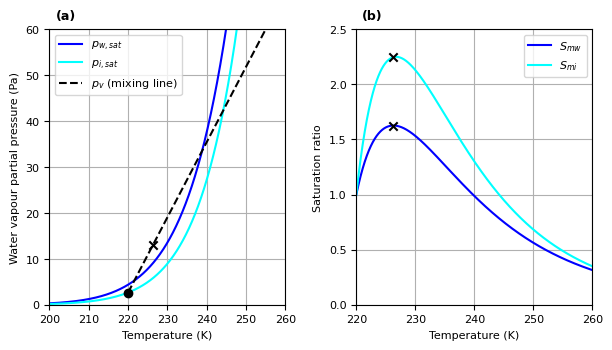

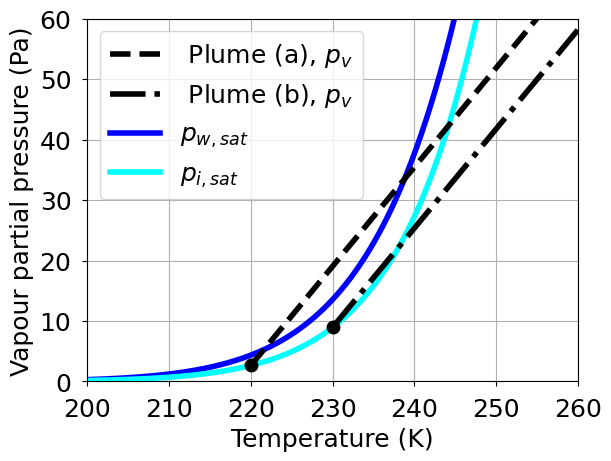

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import Thermodynamic_funcs as Tf
import Mixing_line_funcs as Mf

plt.rcParams['font.size']   = 8
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['font.serif']  = 'Times New Roman'

# Generate data
T     = np.linspace(200, 300, 10000)
pwsat = Tf.e_sat_murphy_koop(T)
piSat = Tf.p_sat_ice_murphy_koop(T)

G   = 1.64
TP  = np.linspace(200, 300, 10000)
pvP = Tf.p_sat_ice_murphy_koop(220) + G * (TP - 220)

Sw   = Mf.saturation_ratio_mixing_line(TP, 220, G, Tf.e_sat_murphy_koop(220))
Si   = Mf.saturation_ratio_mixing_line_ice(TP, 220, G, Tf.p_sat_ice_murphy_koop(220))
maxw = np.argmax(Sw)

# Create a 6×3.5 inch figure without constrained_layout
fig, axes = plt.subplots(1, 2, figsize=(6, 3.5), constrained_layout=False)

# --- Left panel: partial pressures ---
ax = axes[0]
ax.scatter(220, Tf.p_sat_ice_murphy_koop(220), color='black', marker='o', zorder=4)
ax.scatter(TP[maxw], pvP[maxw], color='black', marker='x', zorder=4)
ax.plot(T, pwsat, color='blue', label=r'$p_{w,sat}$')
ax.plot(T, piSat, color='cyan', label=r'$p_{i,sat}$')
ax.plot(
    TP[TP >= 220],
    pvP[pvP >= Tf.p_sat_ice_murphy_koop(220)],
    label=r'$p_v$ (mixing line)',
    linestyle='--',
    color='black'
)
ax.set_xlabel('Temperature (K)')
ax.set_xlim(200, 260)
ax.set_ylim(0, 60)
ax.set_ylabel('Water vapour partial pressure (Pa)')
ax.legend()
ax.grid()

# --- Right panel: saturation ratios ---
ax = axes[1]
ax.plot(T, Sw, color='blue', label=r'$S_{mw}$')
ax.plot(T, Si, color='cyan', label=r'$S_{mi}$')
ax.scatter(T[maxw], Sw[maxw], color='black', marker='x', zorder=4)
ax.scatter(T[maxw], Si[maxw], color='black', marker='x', zorder=4)
ax.set_xlabel('Temperature (K)')
ax.set_xlim(220, 260)
ax.set_ylim(0, 2.5)
ax.set_ylabel('Saturation ratio')
ax.legend()
ax.grid()

fig.subplots_adjust(
    bottom=0.12,  # ↑ increased from 0.05 to 0.12
    top=0.9071,
    left=0.075,
    right=0.98,
    wspace=0.3,  # ↑ increased from 0.2 to 0.3
)

# Add panel labels just above the top-left of each axes
labels = ['(a)', '(b)']
for ax, lab in zip(axes, labels):
    bbox = ax.get_position()
    x = bbox.x0
    y = bbox.y1
    dx = 0.01
    dy = 0.02
    fig.text(
        x + dx, y + dy, lab,
        ha='left', va='bottom',
        fontsize=9, fontweight='bold'
    )

plt.show()
# Save the figure
#fig.savefig('mixing_line_diagram.png', dpi=400, bbox_inches='tight')


#figure for poster
pvP2 = Tf.p_sat_ice_murphy_koop(230) + G * (TP - 230)
plt.rcParams['font.size']   = 18

fig2, ax2 = plt.subplots(figsize=(6, 4.5), constrained_layout=True)
ax2.plot(TP[TP >= 220], pvP[pvP >= Tf.p_sat_ice_murphy_koop(220)], label=r' Plume (a), $p_v$', linestyle='--', color='black', linewidth=4, zorder=3)
ax2.plot(TP[TP >= 230], pvP2[pvP2 >= Tf.p_sat_ice_murphy_koop(230)], label=r' Plume (b), $p_v$', linestyle='-.', color='black', linewidth=4, zorder=3)
ax2.scatter(220, Tf.p_sat_ice_murphy_koop(220), color='black', marker='o', zorder=4, linewidth=4)
ax2.plot(T, pwsat, color='blue', label=r'$p_{w,sat}$', linewidth=4)
ax2.plot(T, piSat, color='cyan', label=r'$p_{i,sat}$', linewidth=4)
ax2.scatter(230, Tf.p_sat_ice_murphy_koop(230), color='black', marker='o', zorder=4, linewidth=4)
ax2.set_xlabel('Temperature (K)')
ax2.set_xlim(200, 260)
ax2.set_ylim(0, 60)
ax2.set_ylabel('Vapour partial pressure (Pa)')
ax2.legend()
ax2.grid()
ax2.tick_params(axis='x', pad=8)   
ax2.tick_params(axis='y', pad=8)   

plt.show()
# Save the figure for poster
#fig2.savefig('mixing_line_diagram_poster.png', dpi=1200, bbox_inches='tight')

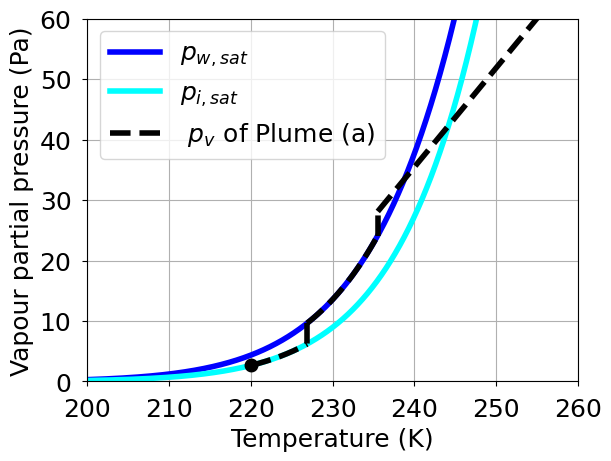

In [14]:
pvP2point = Tf.p_sat_ice_murphy_koop(220) + G * (235.52552 - 220)

Po = np.linspace(Tf.e_sat_murphy_koop(235.52552), pvP2point, 2)
To = np.array([235.52552, 235.52552])

T3 = np.linspace(226.8824, 235.52552, 10000)
P3 = Tf.e_sat_murphy_koop(T3)

T4 = np.array([226.8824, 226.8824])
P4 = np.array([Tf.e_sat_murphy_koop(226.8824), Tf.p_sat_ice_murphy_koop(226.8824)])

T5 = np.linspace(220, 226.8824, 10000)
P5 = Tf.p_sat_ice_murphy_koop(T5)

fig2, ax2 = plt.subplots(figsize=(6, 4.5), constrained_layout=True)
ax2.plot(T, pwsat, color='blue', label=r'$p_{w,sat}$', linewidth=4)
ax2.plot(T, piSat, color='cyan', label=r'$p_{i,sat}$', linewidth=4)
ax2.scatter(220, Tf.p_sat_ice_murphy_koop(220), color='black', marker='o', zorder=4, linewidth=4)
ax2.plot(TP[TP >= 235.52552], pvP[pvP >= pvP2point], label=r' $p_v$ of Plume (a)', linestyle='--', color='black', linewidth=4, zorder=3)
ax2.plot(To, Po, linestyle='--', color='black', linewidth=4, zorder=3)
ax2.plot(T3, P3, linestyle='--', color='black', linewidth=4, zorder=3)
ax2.plot(T4, P4, linestyle='--', color='black', linewidth=4, zorder=3)
ax2.plot(T5, P5, linestyle='--', color='black', linewidth=4, zorder=3)
ax2.set_xlabel('Temperature (K)')
ax2.set_xlim(200, 260)
ax2.set_ylim(0, 60)
ax2.set_ylabel('Vapour partial pressure (Pa)')
ax2.legend()
ax2.grid()
ax2.tick_params(axis='x', pad=8)   
ax2.tick_params(axis='y', pad=8) 

plt.show()
fig2.savefig('mixing_line_diagram_poster2.png', dpi=1200, bbox_inches='tight')

G2 = 1.6552257847537655


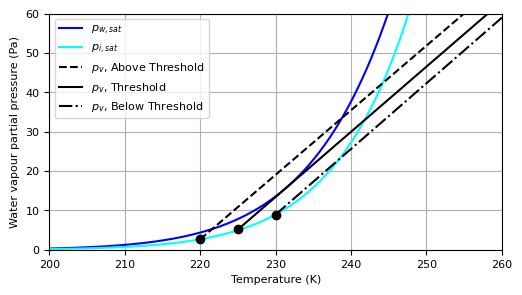

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import Thermodynamic_funcs as Tf
import Mixing_line_funcs as Mf

plt.rcParams['font.size']   = 8
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['font.serif']  = 'Times New Roman'

# Generate data
T     = np.linspace(200, 300, 10000)
Te = 600
pwsat = Tf.e_sat_murphy_koop(T)
piSat = Tf.p_sat_ice_murphy_koop(T)

G   = 1.64
TP  = np.linspace(200, 300, 10000)
pvP = Tf.p_sat_ice_murphy_koop(220) + G * (TP - 220)

pve = Tf.p_sat_ice_murphy_koop(220) + G * (Te - 220)

G2 = (pve - Tf.e_sat_murphy_koop(231.2)) / (Te - 231.2)
TP2 = np.linspace(225, 300, 10000)
pvP2 = Tf.e_sat_murphy_koop(231.2) + G2 * (TP2 - 231.2)

print('G2 =', G2)

G3 = (pve - Tf.p_sat_ice_murphy_koop(230)) / (Te - 230)
TP3 = np.linspace(230, 300, 10000)
pvP3 = Tf.p_sat_ice_murphy_koop(230) + G3 * (TP3 - 230)

# Create a 6×3.5 inch figure without constrained_layout
fig, ax = plt.subplots(figsize=(4, 2.5), constrained_layout=False)

ax.scatter(220, Tf.p_sat_ice_murphy_koop(220), color='black', marker='o', zorder=4)
ax.plot(T, pwsat, color='blue', label=r'$p_{w,sat}$')
ax.plot(T, piSat, color='cyan', label=r'$p_{i,sat}$')
ax.plot(
    TP[TP >= 220],
    pvP[pvP >= Tf.p_sat_ice_murphy_koop(220)],
    label=r'$p_v$, Above Threshold',
    linestyle='--',
    color='black'
)
ax.plot(
    TP2,
    pvP2,
    label=r'$p_v$, Threshold',
    linestyle='-',
    color='black'
)

ax.plot(
    TP3,
    pvP3,
    label=r'$p_v$, Below Threshold',
    linestyle='-.',
    color='black'
)
ax.scatter(TP2[0], pvP2[0], color='black', marker='o', zorder=4)
ax.scatter(TP3[0], pvP3[0], color='black', marker='o', zorder=4)
ax.set_xlabel('Temperature (K)')
ax.set_xlim(200, 260)
ax.set_ylim(0, 60)
ax.set_ylabel('Water vapour partial pressure (Pa)')
ax.legend()
ax.grid()

fig.subplots_adjust(
    bottom=0.12,  # ↑ increased from 0.05 to 0.12
    top=0.9071,
    left=0.075,
    right=0.98,
    wspace=0.3,  # ↑ increased from 0.2 to 0.3
)

fig.savefig('SAC_mixing_line_diagram.png', dpi=400, bbox_inches='tight')